In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import dabest
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [3]:
%matplotlib inline

In [3]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\character_summery\SP_COM\CA1_SP_COM_2day.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\character_summery\SP_COM\CA3_SP_COM_2day.mat'
CA1_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_data = scipy.io.loadmat(ca3_fn_dist_fp)

In [5]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\character_summery\CA1_inout_ratio_fn.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\character_summery\CA3_inout_ratio_fn.mat'
CA1_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_data = scipy.io.loadmat(ca3_fn_dist_fp)

In [6]:
CA3_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 14 12:21:13 2020',
 '__version__': '1.0',
 '__globals__': [],
 'f_ratio': array([[1.82627867e-01, 1.21227910e-01, 6.56168898e-02, 9.79899906e-03,
         1.25008315e-02, 1.79294860e-02, 1.33546519e-02, 1.23411428e-02,
         9.47427593e-03, 4.11902902e-03, 1.23670218e-02, 9.19169719e-03,
         3.22283777e-02, 9.35787101e-02, 4.31012173e-02, 2.78939079e-03,
         7.53672413e-03, 3.13597532e-02, 6.97777134e-03, 1.78917889e-02,
         2.15590606e-02, 1.41318980e-02, 2.26711613e-02, 2.83834767e-02,
         3.67142617e-02, 1.58693394e-03, 1.51347260e-02, 4.44441331e-02,
         1.08252293e-02, 7.12925366e-03, 3.59658047e-02, 1.24508060e-02,
         5.13678841e-03, 3.28697650e-02, 2.50082592e-02, 2.28854580e-01,
         5.69672579e-01, 5.93370247e-02, 5.38789276e-03, 3.92223403e-02,
         3.20913683e-02, 1.04624820e-02, 3.21570968e-02, 7.47199628e-03,
         2.02713378e-03, 1.98480206e-01, 4.9795

In [8]:
for t in range(4):
    print(t)
    if t==0:
        new_pd_dict = [{'ratio': CA1_data['f_ratio'][0][i], 'type':'CA1','condition':'f'} for i in range(len( CA1_data['f_ratio'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'ratio': CA1_data['n_ratio'][0][i], 'type':'CA1','condition':'n'} for i in range(len( CA1_data['n_ratio'][0]))]
    elif t==2:
        new_pd_dict += [{'ratio': CA3_data['f_ratio'][0][i], 'type':'CA3','condition':'f'} for i in range(len( CA3_data['f_ratio'][0]))]# for j in range(N_trial)]
    elif t==3:
        new_pd_dict += [{'ratio': CA3_data['n_ratio'][0][i], 'type':'CA3','condition':'n'} for i in range(len( CA3_data['n_ratio'][0]))]
    
    
    
    new_pd_result = pd.DataFrame(new_pd_dict)   

0
1
2
3


In [25]:
new_pd_result['type']

0       CA1
1       CA1
2       CA1
3       CA1
4       CA1
       ... 
3476    CA3
3477    CA3
3478    CA3
3479    CA3
3480    CA3
Name: type, Length: 3481, dtype: object

C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
 

DABEST v0.3.0
             
Good evening!
The current time is Sun Jun 14 22:00:59 2020.

The unpaired mean difference between f and n is 0.041 [95%CI 0.035, 0.047].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

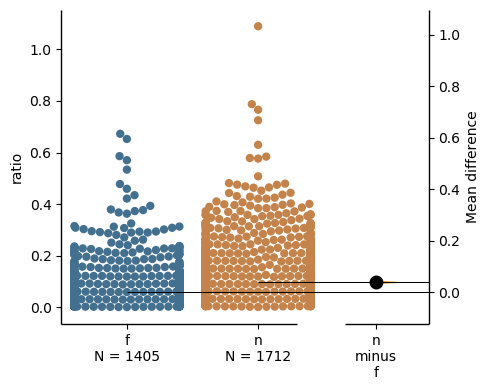

In [9]:
# Load the above data into `dabest`.
cor_dabest = dabest.load(data=new_pd_result[new_pd_result['type']=='CA1'], x="condition", y="ratio",
                          idx=("f", "n"))

# Produce a Cumming estimation plot.
cor_dabest.mean_diff.plot();
plt.savefig('CA1-fn_ratio_dabest.svg')
cor_dabest.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Sun Jun 14 22:01:42 2020.

The unpaired mean difference between f and n is 0.041 [95%CI 0.0307, 0.0505].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

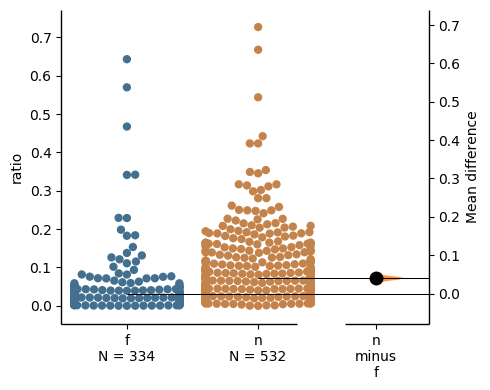

In [10]:
# Load the above data into `dabest`.
cor_dabest = dabest.load(data=new_pd_result[new_pd_result['type']=='CA3'], x="condition", y="ratio",
                          idx=("f", "n"))

# Produce a Cumming estimation plot.
cor_dabest.mean_diff.plot();

plt.savefig('CA3-ratio_SP_dabest.svg')
cor_dabest.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Sun Jun 14 22:04:37 2020.

The unpaired mean difference between CA1 and CA3 is -0.0245 [95%CI -0.0311, -0.0144].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

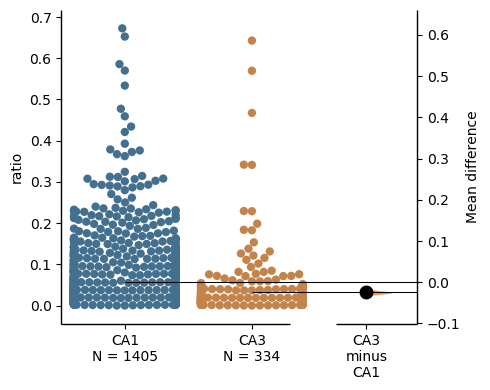

In [11]:
# Load the above data into `dabest`.
cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='f'], x="type", y="ratio",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
cor_dabest.mean_diff.plot();
cor_dabest.mean_diff
plt.savefig('CA1_CA3-f_ratio_dabest.svg')
cor_dabest.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Sun Jun 14 22:04:54 2020.

The unpaired mean difference between CA1 and CA3 is -0.0246 [95%CI -0.0325, -0.0159].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

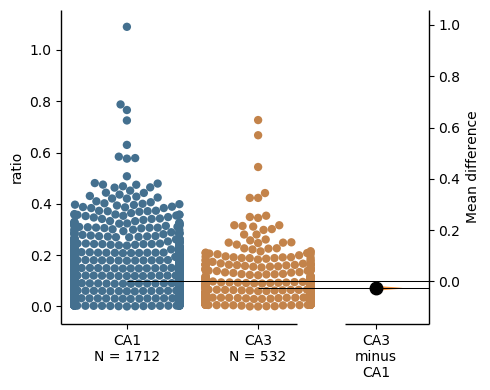

In [12]:
# Load the above data into `dabest`.
cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='n'], x="type", y="ratio",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
cor_dabest.mean_diff.plot();
cor_dabest.mean_diff
plt.savefig('CA1_CA3-n_ratio_dabest.svg')
cor_dabest.mean_diff

In [17]:
for t in range(6):
    print(t)
    if t==0:
        new_pd_dict = [{'cor': CA1_cor_data['f_cor'][0][i], 'type':'CA1ff','condition':'ff','region':'CA1'} for i in range(len(CA1_cor_data['f_cor'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'cor': CA1_cor_data['total_cor'][0][i], 'type':'CA1fn','condition':'fn','region':'CA1'} for i in range(len(CA1_cor_data['total_cor'][0]))]
    #elif t==2:
        #new_pd_dict += [{'cor': CA1_cor_data['n_cor'][0][i], 'type':'CA1nn','condition':'nn','region':'CA1'} for i in range(len(CA1_cor_data['n_cor'][0]))]
    
    elif t==3:
        new_pd_dict += [{'cor': CA3_cor_data['f_cor'][0][i], 'type':'CA3ff','condition':'ff','region':'CA3'} for i in range(len(CA3_cor_data['f_cor'][0]))]
    elif t==4: 
        new_pd_dict += [{'cor': CA3_cor_data['total_cor'][0][i], 'type':'CA3fn','condition':'fn','region':'CA3'} for i in range(len(CA3_cor_data['total_cor'][0]))]
    #elif t==5:
            #new_pd_dict += [{'cor': CA3_cor_data['n_cor'][0][i], 'type':'CA3nn','condition':'nn','region':'CA3'} for i in range(len(CA3_cor_data['n_cor'][0]))]
    new_pd_result = pd.DataFrame(new_pd_dict)            
        
        
#print(new_pd_dict)        
#print(new_pd_result)

0
1
2
3
4
5


DABEST v0.3.0
             
Good evening!
The current time is Sun May 17 12:39:17 2020.

The unpaired mean difference between CA1ff and CA1fn is -0.784 [95%CI -0.799, -0.767].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

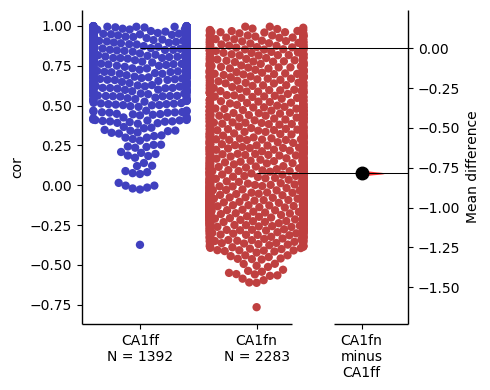

In [26]:
# Load the above data into `dabest`.
CA1fn_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['region']=='CA1'], x="type", y="cor",
                          idx=("CA1ff","CA1fn" ))
CA3fn_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['region']=='CA3'], x="type", y="cor",
                          idx=("CA3ff","CA3fn" ))
CA13f_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='ff'], x="type", y="cor",
                          idx=("CA1ff","CA3ff" ))
CA13fn_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='fn'], x="type", y="cor",
                          idx=("CA1fn","CA3fn" ))
# Produce a Cumming estimation plot.
CA1fn_cor_dabest.mean_diff.plot(custom_palette=["blue","red"]);

CA1fn_cor_dabest.mean_diff
#plt.savefig('CA1-CA3_cor_n2days_dabest.svg')

DABEST v0.3.0
             
Good evening!
The current time is Sun May 17 12:40:04 2020.

The unpaired mean difference between CA3ff and CA3fn is -0.852 [95%CI -0.881, -0.821].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

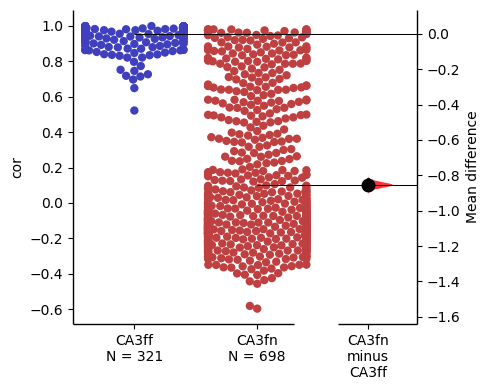

In [27]:
CA3fn_cor_dabest.mean_diff.plot(custom_palette=["blue","red"]);

CA3fn_cor_dabest.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Sun May 17 12:40:06 2020.

The unpaired mean difference between CA1ff and CA3ff is 0.0963 [95%CI 0.0842, 0.107].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

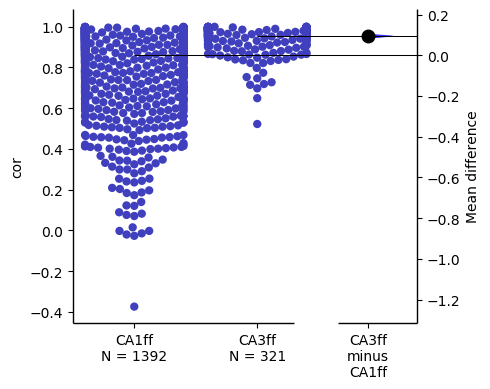

In [28]:
CA13f_cor_dabest.mean_diff.plot(custom_palette=["blue","blue"]);

CA13f_cor_dabest.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Sun May 17 12:40:21 2020.

The unpaired mean difference between CA1fn and CA3fn is 0.0281 [95%CI -0.00268, 0.0624].
The p-value of the two-sided permutation t-test is 0.067. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

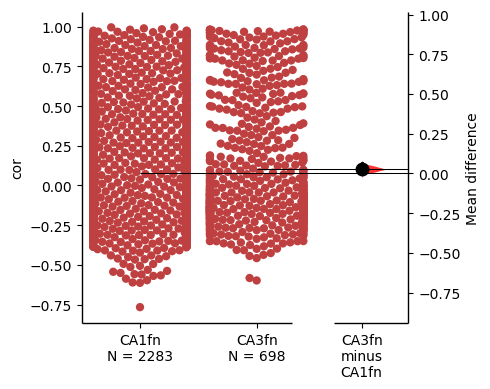

In [29]:
CA13fn_cor_dabest.mean_diff.plot(custom_palette=["red","red"]);

CA13fn_cor_dabest.mean_diff

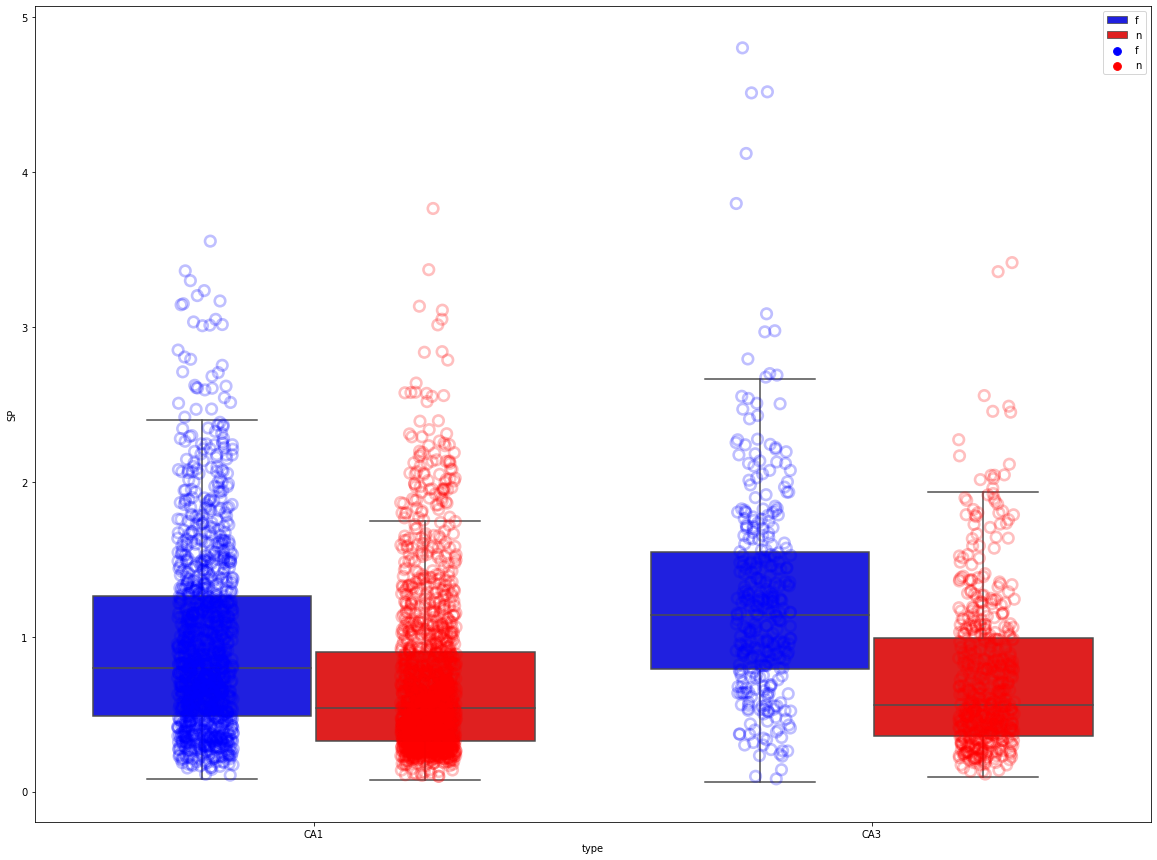

In [48]:
#ax = sns.stripplot(x="type", y="cor", data=new_pd_result[new_pd_result.condition=='n'])
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="type", y="SP", hue="condition",
                   data=new_pd_result, palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="SP",  palette=["blue","red"],hue="condition",
                   data=new_pd_result,marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
#plt.savefig('CA1-CA3_SP_fn.svg')
#print('CA1CA3f ransum p value '+str(stats.ranksums(CA1_cor_data['f_cor'][0],CA3_cor_data['f_cor'][0])[1]))
#print('CA1CA3f t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['f_cor'][0],CA3_cor_data['f_cor'][0])[1]))

#print('CA1CA3n ransum p value '+str(stats.ranksums(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])[1]))
#print('CA1CA3n t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])[1]))
                                                                                         
#print('CA1fn ransum p value '+str(stats.ranksums(CA1_cor_data['f_cor'][0],CA1_cor_data['n_cor'][0])[1]))
#print('CA1fn t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['f_cor'][0],CA1_cor_data['n_cor'][0])[1]))

#print('CA3fn ransum p value '+str(stats.ranksums(CA3_cor_data['f_cor'][0],CA3_cor_data['n_cor'][0])[1]))
#print('CA3fn t test p value '+str(scipy.stats.ttest_ind(CA3_cor_data['f_cor'][0],CA3_cor_data['n_cor'][0])[1]))

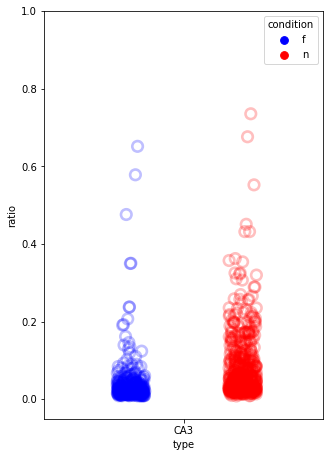

In [19]:
#plt.figure(figsize=(5,7.5))
#ax = sns.boxplot(x="type", y="SP", hue="condition",
#                   data=new_pd_result[new_pd_result['condition']=='n'], palette=["red","red"], dodge=True,showfliers=False)
#ax.set(ylim=(0, 4))
#plt.savefig('CA1_CA3_SP_n_box.svg')
plt.figure(figsize=(5,7.5))
ax1 = sns.stripplot(x="type", y="ratio",  palette=["blue","red"],hue="condition",
                   data=new_pd_result[new_pd_result['type']=='CA3'],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax1.set(ylim=(-0.05, 1))
plt.savefig('CA3_ratio_fn_strip.svg')

RanksumsResult(statistic=-7.8269283892050465, pvalue=4.999336550884233e-15)

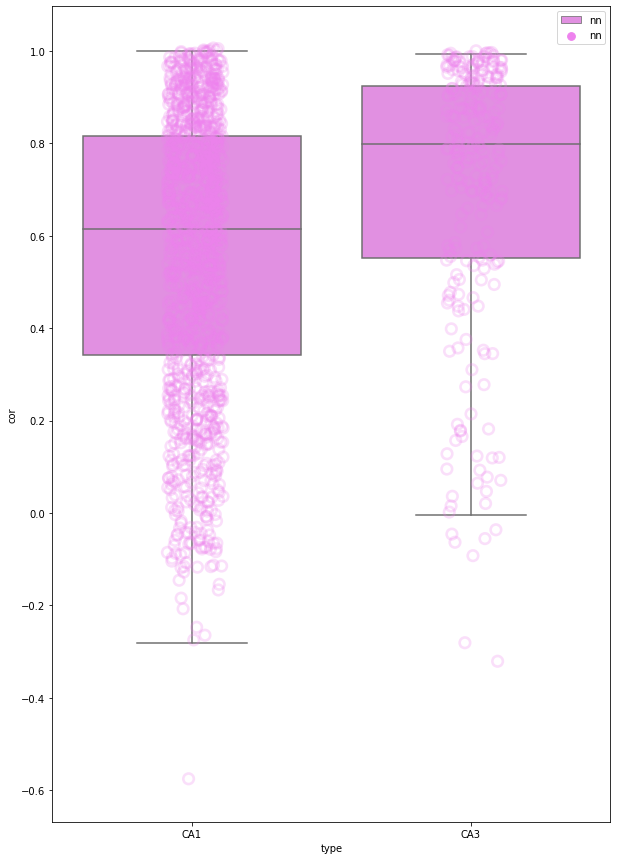

In [29]:
plt.figure(figsize=(10,15))
ax = sns.boxplot(x="type", y="cor", hue="condition",
                   data=new_pd_result[new_pd_result['condition']=='nn'], palette=["violet"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="cor",  palette=["violet"],hue="condition",
                   data=new_pd_result[new_pd_result['condition']=='nn'],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
stats.ranksums(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])

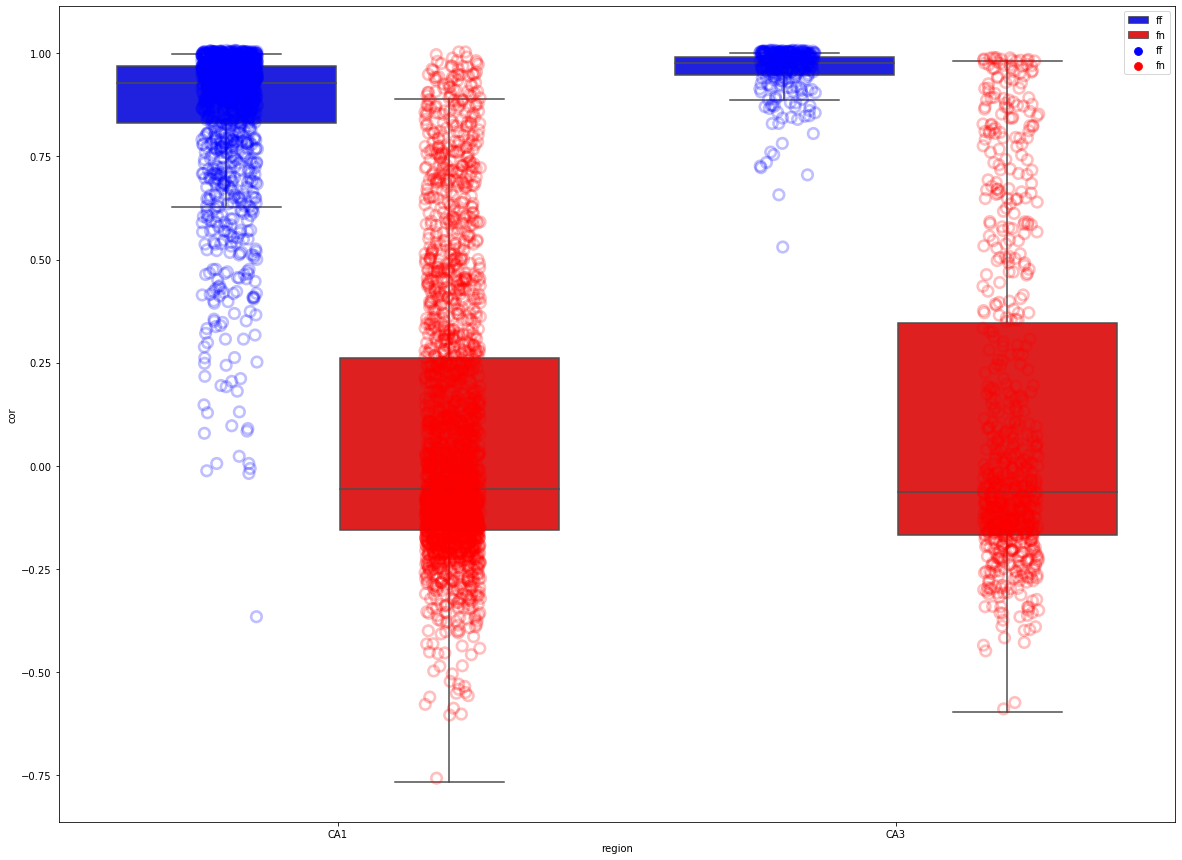

In [15]:
#ax = sns.stripplot(x="type", y="cor", data=new_pd_result[new_pd_result.condition=='n'])
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="region", y="cor", hue="condition",
                   data=new_pd_result, palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="region", y="cor",  palette=["blue","red"],hue="condition",
                   data=new_pd_result,marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()

In [32]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA1\ca1_cor_10-20lap.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA3\ca3_cor_10-20lap.mat'
CA1_cor_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_cor_data = scipy.io.loadmat(ca3_fn_dist_fp)
for t in range(6):
    #print(t)
    if t==0:
        new_pd_dict = [{'cor': CA1_cor_data['f_cor'][0][i], 'type':'CA1ff','condition':'ff','region':'CA1'} for i in range(len(CA1_cor_data['f_cor'][0]))]# for j in range(N_trial)]
    #elif t==1:
    #    new_pd_dict += [{'cor': CA1_cor_data['total_cor'][0][i], 'type':'CA1fn','condition':'fn','region':'CA1'} for i in range(len(CA1_cor_data['total_cor'][0]))]
    elif t==2:
        new_pd_dict += [{'cor': CA1_cor_data['n_cor'][0][i], 'type':'CA1nn','condition':'nn','region':'CA1'} for i in range(len(CA1_cor_data['n_cor'][0]))]
    
    elif t==3:
        new_pd_dict += [{'cor': CA3_cor_data['f_cor'][0][i], 'type':'CA3ff','condition':'ff','region':'CA3'} for i in range(len(CA3_cor_data['f_cor'][0]))]
    #elif t==4: 
    #    new_pd_dict += [{'cor': CA3_cor_data['total_cor'][0][i], 'type':'CA3fn','condition':'fn','region':'CA3'} for i in range(len(CA3_cor_data['total_cor'][0]))]
    elif t==5:
        new_pd_dict += [{'cor': CA3_cor_data['n_cor'][0][i], 'type':'CA3nn','condition':'nn','region':'CA3'} for i in range(len(CA3_cor_data['n_cor'][0]))]
    new_pd_result = pd.DataFrame(new_pd_dict)            
        
        
#print(new_pd_dict)        
#print(new_pd_result)

In [35]:
# Load the above data into `dabest`.
CA1fn_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['region']=='CA1'], x="type", y="cor",
                          idx=("CA1ff","CA1nn" ))
CA3fn_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['region']=='CA3'], x="type", y="cor",
                          idx=("CA3ff","CA3nn" ))
CA13f_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='ff'], x="type", y="cor",
                          idx=("CA1ff","CA3ff" ))
CA13n_cor_dabest = dabest.load(data=new_pd_result[new_pd_result['condition']=='nn'], x="type", y="cor",
                          idx=("CA1nn","CA3nn" ))
# Produce a Cumming estimation plot.

C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
C:\Users\Can\Anaconda3\lib\site-packages\seaborn\utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
 

DABEST v0.3.0
             
Good afternoon!
The current time is Sun May 17 14:29:13 2020.

The unpaired mean difference between CA1ff and CA1nn is -0.133 [95%CI -0.15, -0.114].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

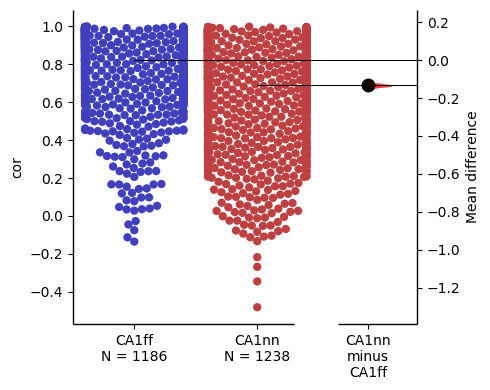

In [34]:
CA1fn_cor_dabest.mean_diff.plot(custom_palette=["blue","red"]);

CA1fn_cor_dabest.mean_diff
#plt.savefig('CA1-CA3_cor_n2days_dabest.svg')

DABEST v0.3.0
             
Good afternoon!
The current time is Sun May 17 14:31:08 2020.

The unpaired mean difference between CA3ff and CA3nn is -0.146 [95%CI -0.18, -0.115].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

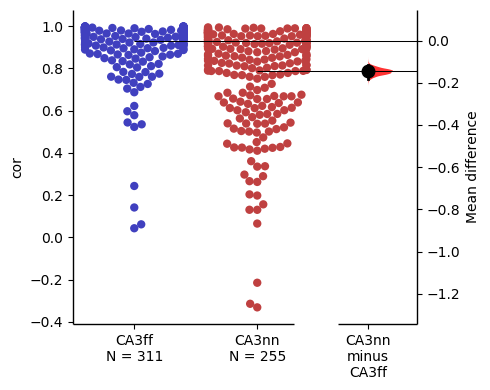

In [38]:
CA3fn_cor_dabest.mean_diff.plot(custom_palette=["blue","red"]);

CA3fn_cor_dabest.mean_diff

DABEST v0.3.0
             
Good afternoon!
The current time is Sun May 17 14:30:55 2020.

The unpaired mean difference between CA1ff and CA3ff is 0.111 [95%CI 0.0912, 0.126].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

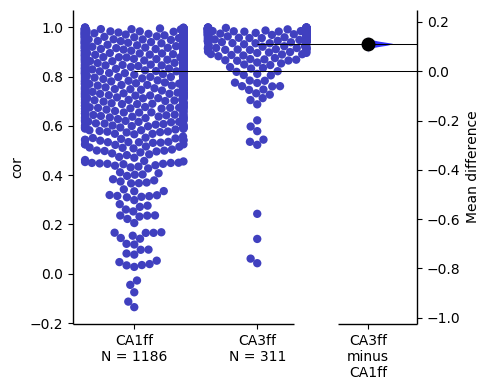

In [37]:
CA13f_cor_dabest.mean_diff.plot(custom_palette=["blue","blue"]);

CA13f_cor_dabest.mean_diff

DABEST v0.3.0
             
Good afternoon!
The current time is Sun May 17 14:30:15 2020.

The unpaired mean difference between CA1nn and CA3nn is 0.098 [95%CI 0.0634, 0.128].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

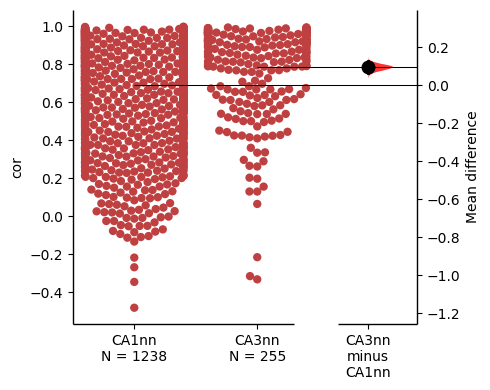

In [36]:
CA13n_cor_dabest.mean_diff.plot(custom_palette=["red","red"]);

CA13n_cor_dabest.mean_diff

No handles with labels found to put in legend.


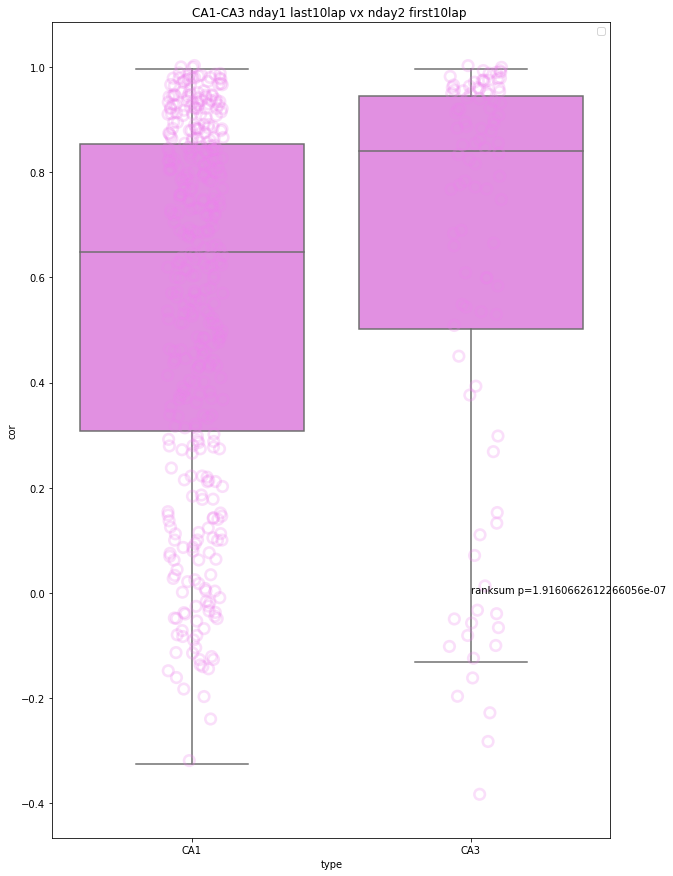

In [14]:
plt.figure(figsize=(10,15))
ax = sns.boxplot(x="type", y="cor", 
                   data=new_pd_result, palette=["violet"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="cor",  palette=["violet"],
                   data=new_pd_result,marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
stats.ranksums(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])
ax.set_title('CA1-CA3 nday1 last10lap vx nday2 first10lap ')
ax.text(1,0,'ranksum p='+str(stats.ranksums(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])[1]))
#ax.text(1,-0.1,'ttest p='+str(scipy.stats.ttest_ind(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])[1]))
plt.savefig('CA1-CA3_cor_n2days.svg')

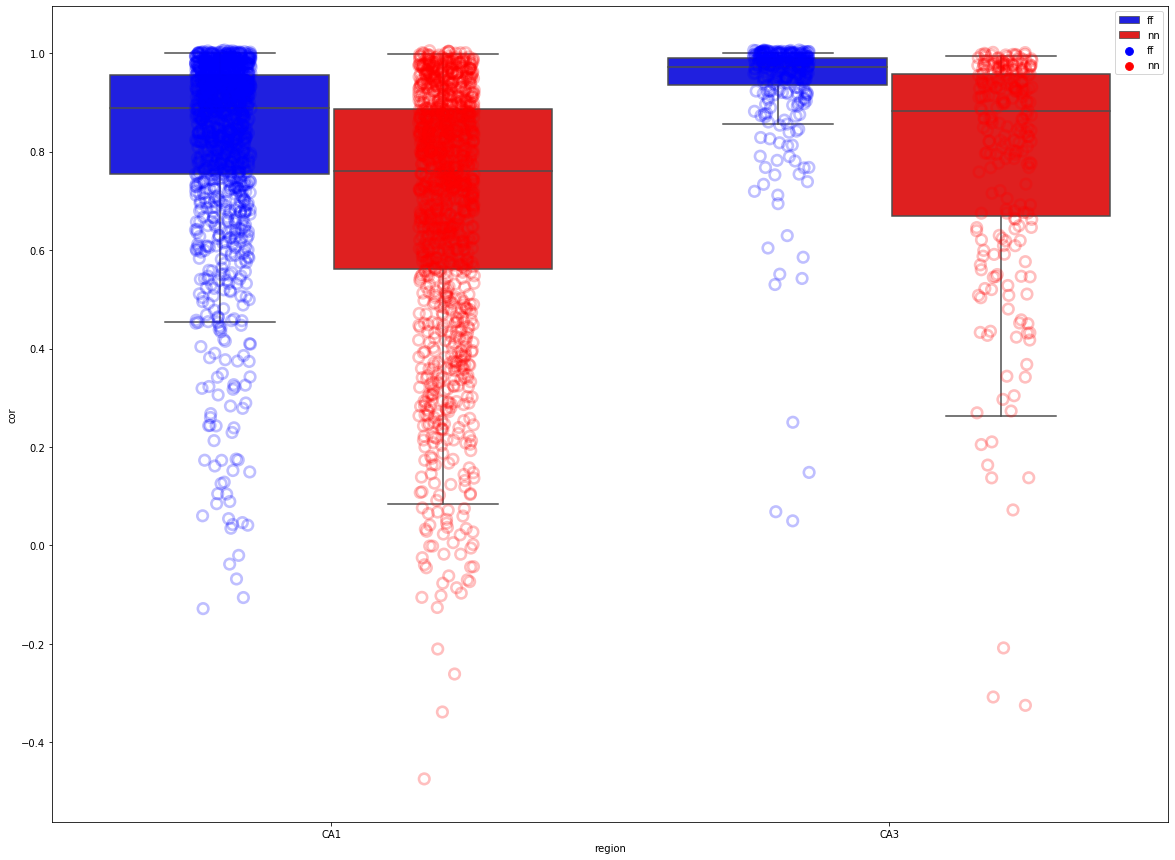

In [31]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="region", y="cor", hue="condition",
                   data=new_pd_result[new_pd_result['condition']!='fn'], palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="region", y="cor",  palette=["blue","red"],hue="condition",
                   data=new_pd_result[new_pd_result['condition']!='fn'],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
plt.savefig('CA1-CA3_cor_ff_nn10-20.svg')

In [19]:
model = ols('cor ~ condition+region+condition:region', new_pd_result[new_pd_result['condition']!='fn']).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res2 = sm.stats.anova_lm(model, typ= 2)
print(res2)


MultiComp = MultiComparison(new_pd_result[new_pd_result['condition']!='fn']['cor'],
                            new_pd_result[new_pd_result['condition']!='fn']['type'])


print(MultiComp.tukeyhsd().summary())

Overall model F( 3, 2986) =  134.128, p =  0.0000
                      sum_sq      df           F        PR(>F)
condition          13.616377     1.0  280.909142  2.500716e-60
region              5.044170     1.0  104.062437  4.837104e-24
condition:region    0.018947     1.0    0.390888  5.318809e-01
Residual          144.738975  2986.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 CA1ff  CA1nn  -0.1327  0.001 -0.1557 -0.1097   True
 CA1ff  CA3ff   0.1109  0.001  0.0749   0.147   True
 CA1ff  CA3nn  -0.0347 0.1026 -0.0737  0.0044  False
 CA1nn  CA3ff   0.2436  0.001  0.2077  0.2795   True
 CA1nn  CA3nn    0.098  0.001  0.0591  0.1369   True
 CA3ff  CA3nn  -0.1456  0.001 -0.1934 -0.0978   True
----------------------------------------------------
